# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [635]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

import time

from uszipcode import SearchEngine

## Loading the dataset

In [636]:
Loan_Data = pd.read_csv("Loan_Modelling.csv") 

## Data Overview

* Observations
* Sanity checks

In [637]:
# Review columns and data types
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [638]:
# Generate descriptive stats on the data set
Loan_Data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [639]:
# Provide a view of the count of rowns and columns in the dat set.
print("The data set has " + str(Loan_Data.shape[0]) + " columns and " + str(Loan_Data.shape[1]) + " rows.")

The data set has 5000 columns and 14 rows.


In [640]:
# Get top 5 rows
Loan_Data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Observations 
- We can see that we will need to remove the ID column as it is not useful in our analysis.

In [641]:
# Identify if we have any missing data
Loan_Data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Observations 
- We can see there is not any missing data.

In [668]:
# Drop the ID column before we start the next analysis
Loan_Data.drop(['ID'], axis=1)


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County,State
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena,Los Angeles County,CA
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles County,CA
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley,Alameda County,CA
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco County,CA
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge,Los Angeles County,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Irvine,Orange County,CA
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,La Jolla,San Diego County,CA
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Ojai,Ventura County,CA
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Los Angeles,Los Angeles County,CA


In [643]:
#create the search engine
search = SearchEngine()

cityArray = []
stateArray = []
countyArray = []
def getCity(z):
    return search.by_zipcode(zip).city
def getCounty(z):
    return search.by_zipcode(zip).county
def getState(z):
    return search.by_zipcode(zip).state

#Loop through zipcodes and set state
for i in range(len(Loan_Data)):
    zip = Loan_Data["ZIPCode"].iloc[i]
    try:
        cityArray.append(getCity(zip))
    except Exception as e: 
        cityArray.append(np.nan)
    try:
        countyArray.append(getCounty(zip))
    except Exception as e: 
        countyArray.append(np.nan)
    try:
        stateArray.append(getState(zip))
    except Exception as e: 
        stateArray.append(np.nan)
    continue

Loan_Data['City'] = cityArray
Loan_Data['County'] = countyArray
Loan_Data['State'] = stateArray
Loan_Data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County,State
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena,Los Angeles County,CA
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles County,CA
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley,Alameda County,CA
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco County,CA
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge,Los Angeles County,CA
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,San Diego,San Diego County,CA
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,Claremont,Los Angeles County,CA
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,Monterey,Monterey County,CA
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,Los Angeles,Los Angeles County,CA
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Ojai,Ventura County,CA


In [644]:
Loan_Data['State'].unique()

array(['CA', nan], dtype=object)

#### Observtions
- All of the data is coming form a single state. In this case California.

In [645]:
Loan_Data['City'].unique()

array(['Pasadena', 'Los Angeles', 'Berkeley', 'San Francisco',
       'Northridge', 'San Diego', 'Claremont', 'Monterey', 'Ojai',
       'Redondo Beach', 'Santa Barbara', 'Belvedere Tiburon', 'Glendora',
       'Santa Clara', 'Capitola', 'Stanford', 'Studio City', 'Daly City',
       'Newbury Park', 'Arcata', 'Santa Cruz', 'Fremont', 'Richmond',
       'Mountain View', 'Huntington Beach', 'Sacramento', 'San Clemente',
       'Davis', 'Redwood City', 'Cupertino', 'Santa Clarita', 'Roseville',
       'Redlands', 'La Jolla', 'Brisbane', 'El Segundo', 'Los Altos',
       'Santa Monica', 'San Luis Obispo', 'Pleasant Hill',
       'Thousand Oaks', 'Rancho Cordova', 'San Jose', 'Reseda', 'Salinas',
       'Cardiff By The Sea', 'Oakland', 'San Rafael', 'Banning',
       'Bakersfield', 'Riverside', 'Rancho Cucamonga', 'Alameda',
       'Palo Alto', 'Livermore', 'Irvine', 'South San Francisco',
       'Emeryville', 'Ridgecrest', nan, 'Hayward', 'San Gabriel',
       'Santa Ana', 'Loma Linda', 'E

In [646]:
Loan_Data['County'].unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County', nan,
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County',
       'Mendocino County', 'San Joaquin County', 'Imperial County',
       'Siskiyou County', 'Merced County', 'Trinity County',
       'Stanislaus County', 'Shasta County', 'Tuolumne County',
       'Napa County', 'Lake County'], dtype=object)

In [647]:
Loan_Data.isna().sum()

ID                     0
Age                    0
Experience             0
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
City                  34
County                34
State                 34
dtype: int64

In [648]:
# Identify the missing zip codes 
missingZips = Loan_Data[Loan_Data['State'].isnull()]

In [649]:
#look a the counts in each zip
missingZips['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

### missing zips
- 3 of the missing zips are from california by simply googling
- 1 is from washington dc
- We will manually code these in the data



In [650]:
# Make updates to eahc state, city and county manually for the zipcodes that did not match
for i in range(len(Loan_Data)):
    zip = Loan_Data["ZIPCode"].iloc[i]
    if zip == 92717:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "San Francisco"
        Loan_Data["County"].iloc[i] = "San Francisco County"
    if zip == 96651:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["County"].iloc[i] = "San Francisco County"
    if zip == 92634:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "Los Angeles County"
    if zip == 93077:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["County"].iloc[i] = "San Francisco County"

C:\Users\andre\AppData\Local\Temp\ipykernel_35168\3586575440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_Data["State"].iloc[i] = "CA"
C:\Users\andre\AppData\Local\Temp\ipykernel_35168\3586575440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_Data["City"].iloc[i] = "San Francisco"
C:\Users\andre\AppData\Local\Temp\ipykernel_35168\3586575440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_Data["County"].il

In [651]:
#check missing vvalues for state one more time
Loan_Data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  7
County                5
State                 0
dtype: int64

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [652]:
# Setup reusable plot functions


# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature,yLabel, xLabel, title, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    bp = sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    hp = sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter", 
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    bp.set(title=title)
    hp.set(ylabel=yLabel,
        xlabel=xLabel)

# function to create labeled barplots


def labeled_barplot(data, feature,yLabel, xLabel, title, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    ax.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

def hist_plot(x,yLabel, xLabel, title):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn box plot
    hp = sns.histplot(data=Loan_Data, x=x)

    #specify axis labels
    hp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()


def count_plot(x,yLabel, xLabel, title):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn countplot
    cp = sns.countplot(data=Loan_Data, x=x)
    #specify axis labels
    cp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()

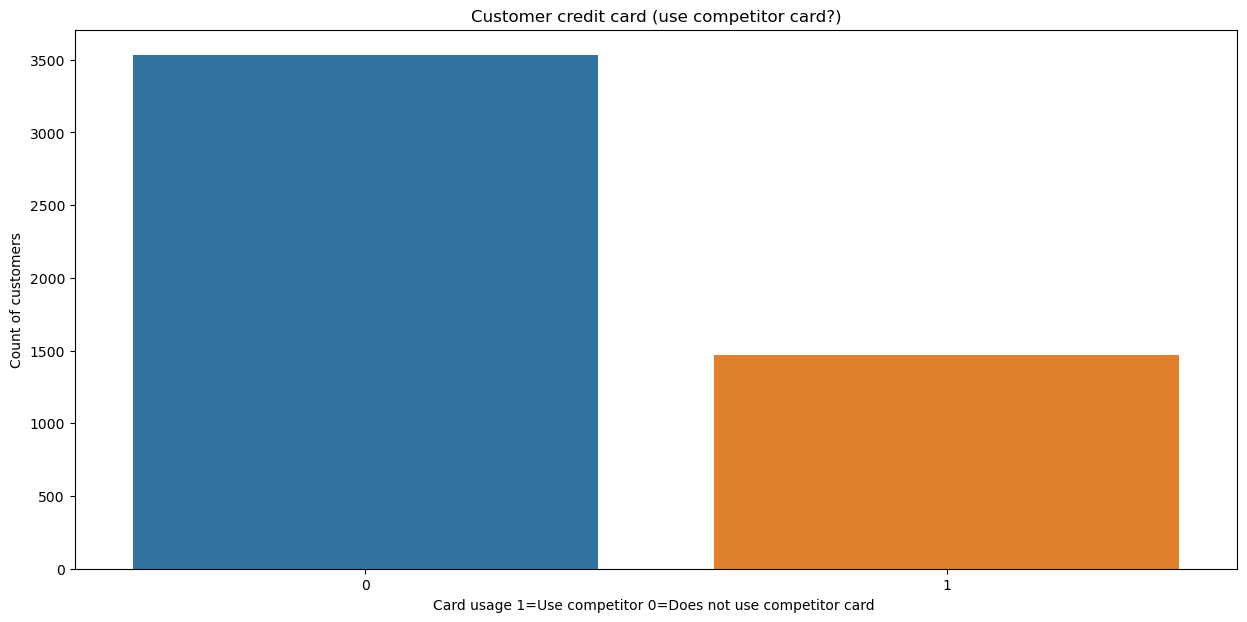

In [653]:
count_plot(Loan_Data['CreditCard'],'Count of customers', 'Card usage 1=Use competitor 0=Does not use competitor card ','Customer credit card (use competitor card?)')

### Observations
- Can see that we have 3500 customers that use another banks credit card and 1500 that do not.

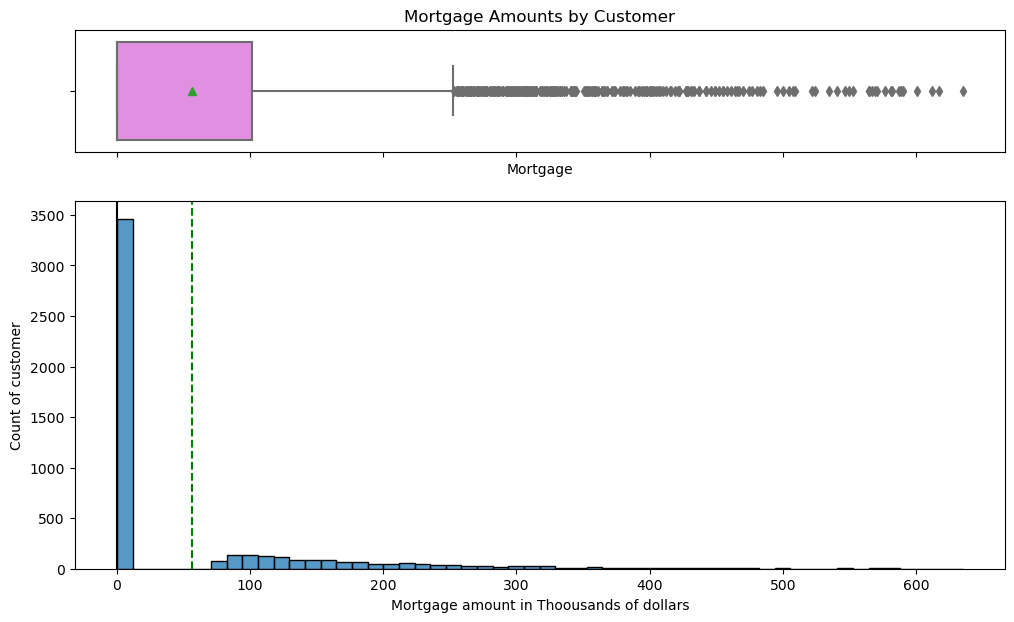

In [654]:
# Mortgage plots
histogram_boxplot(Loan_Data, 'Mortgage','Count of customer','Mortgage amount in Thoousands of dollars','Mortgage Amounts by Customer')

### Observations
- There are a lot customers that do not have a mortgage in the dataset, I am assuming 0 in the data means they do not have a mortgage. About 3500.
- The data is heavily right skewed
- There are many outliers in the data set as shown in the box plot

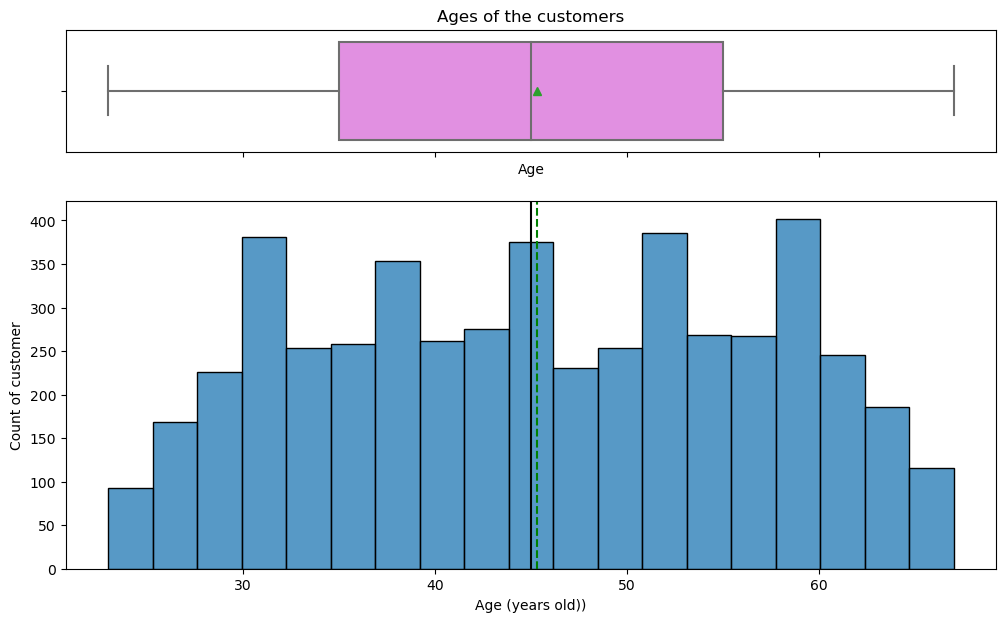

In [655]:
# Age plots
histogram_boxplot(Loan_Data, 'Age','Count of customer','Age (years old))','Ages of the customers')

### Observations
- Average age of the customers is about 45 years old
- Age is pretty evently distributed with some spikes in certain age categories above and below 45 in the data.
- There are no outliers in the data set as shown in the box plot

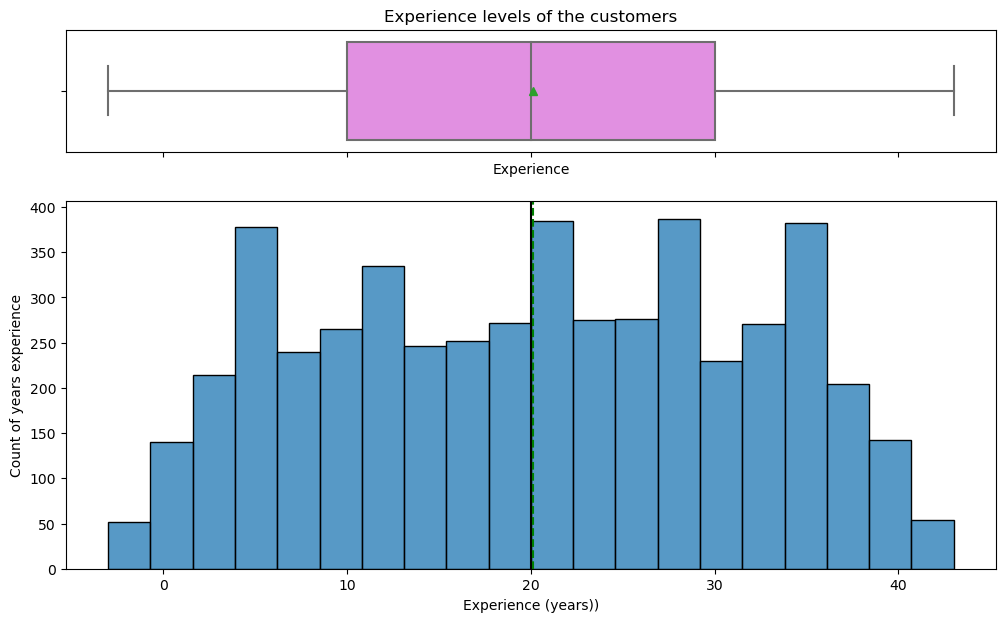

In [656]:
# Age plots
histogram_boxplot(Loan_Data, 'Experience','Count of years experience','Experience (years))','Experience levels of the customers')

### Observations
- Average professional experience level is 20 years.
- Experience is pretty evently distributed with some spikes in certain experience levels above and below 20 in the data.
- There are no outliers in the data set as shown in the box plot

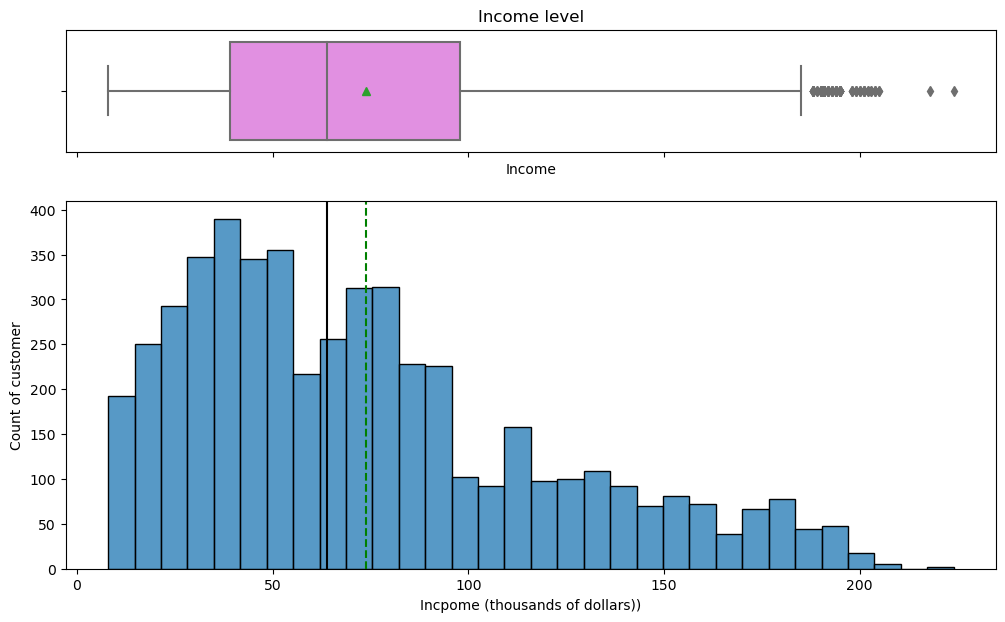

In [657]:
# Age plots
histogram_boxplot(Loan_Data, 'Income','Count of customer','Incpome (thousands of dollars))','Income level')

### Observations
- Average income level is around 70k
- Income is right skewed with many outliers in the higher income levels


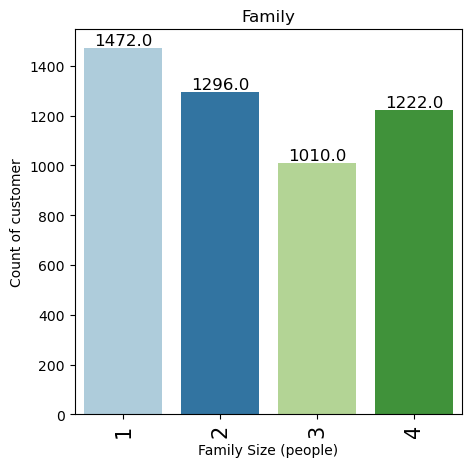

In [658]:
# Family plots
labeled_barplot(Loan_Data, 'Family','Count of customer','Family Size (people)','Family')

### Observations
- Average family size is about 2.4 people.
- Family size ranges from 1 person to 4.


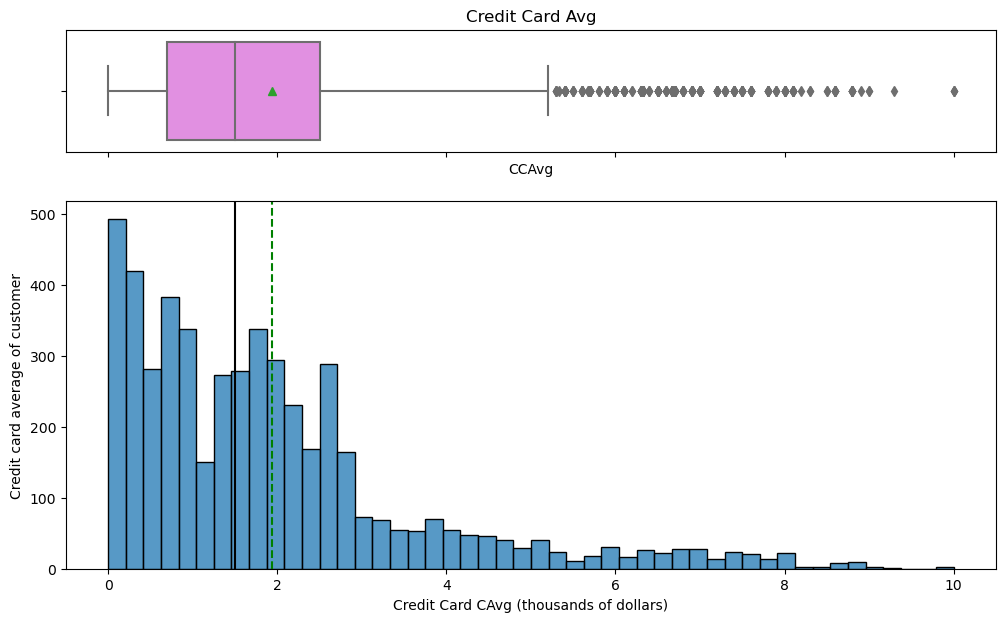

In [659]:
# CCavg plots
histogram_boxplot(Loan_Data, 'CCAvg','Credit card average of customer','Credit Card CAvg (thousands of dollars)','Credit Card Avg')

### Observations
- Average credit card spending is around 2k
- Average spending is right skewed with many outliers up to 10k

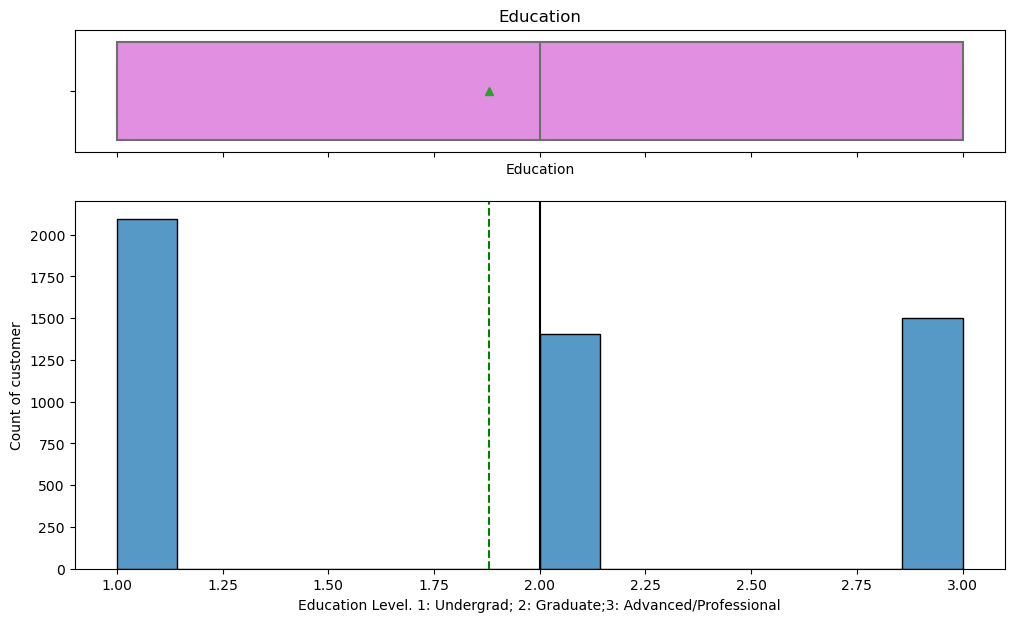

In [660]:
# Education plots
histogram_boxplot(Loan_Data, 'Education','Count of customer','Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional','Education')

### Observations
- Normal distribution of education levels. A slight amount more of undergrads than other 2 categories.


#### Family size vs Average card spend

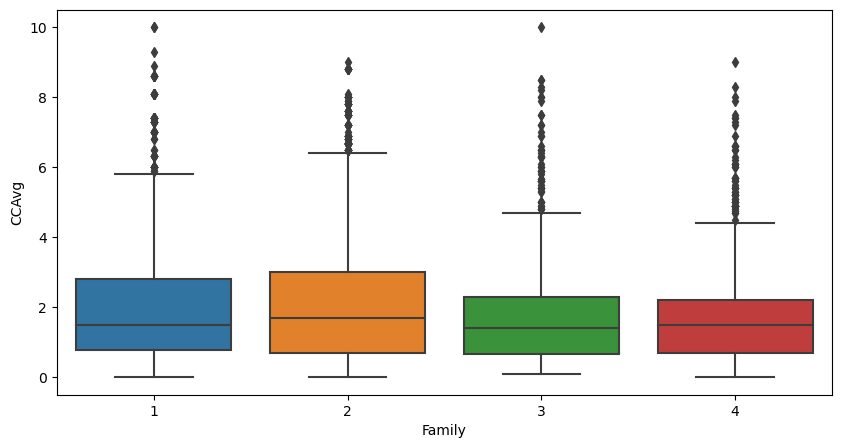

In [661]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Family", y="CCAvg", data=Loan_Data)
plt.show()

#### Education vs Average card spend

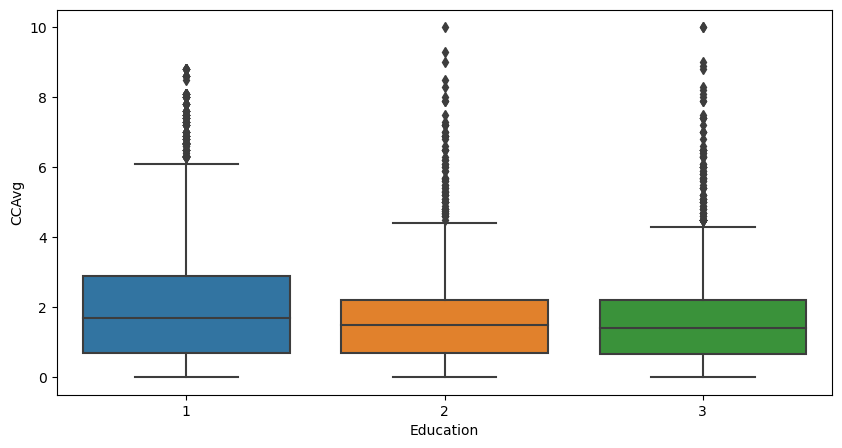

In [662]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Education", y="CCAvg", data=Loan_Data)
plt.show()

#### Income vs Credit card monthly spend

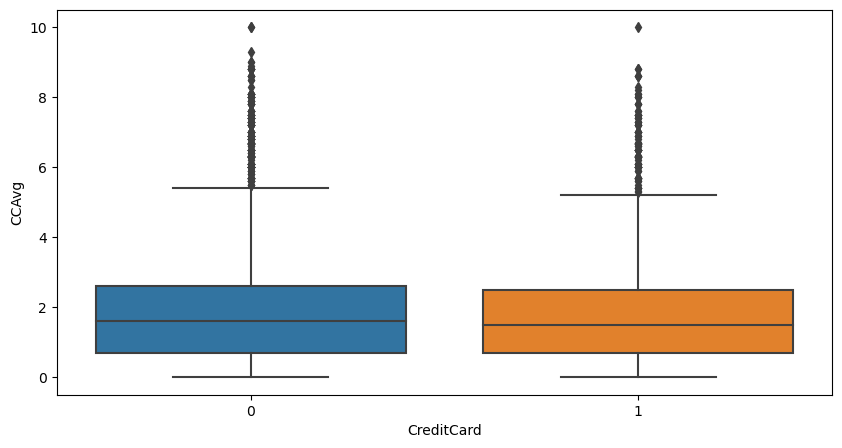

In [663]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="CreditCard", y="CCAvg", data=Loan_Data)
plt.show()

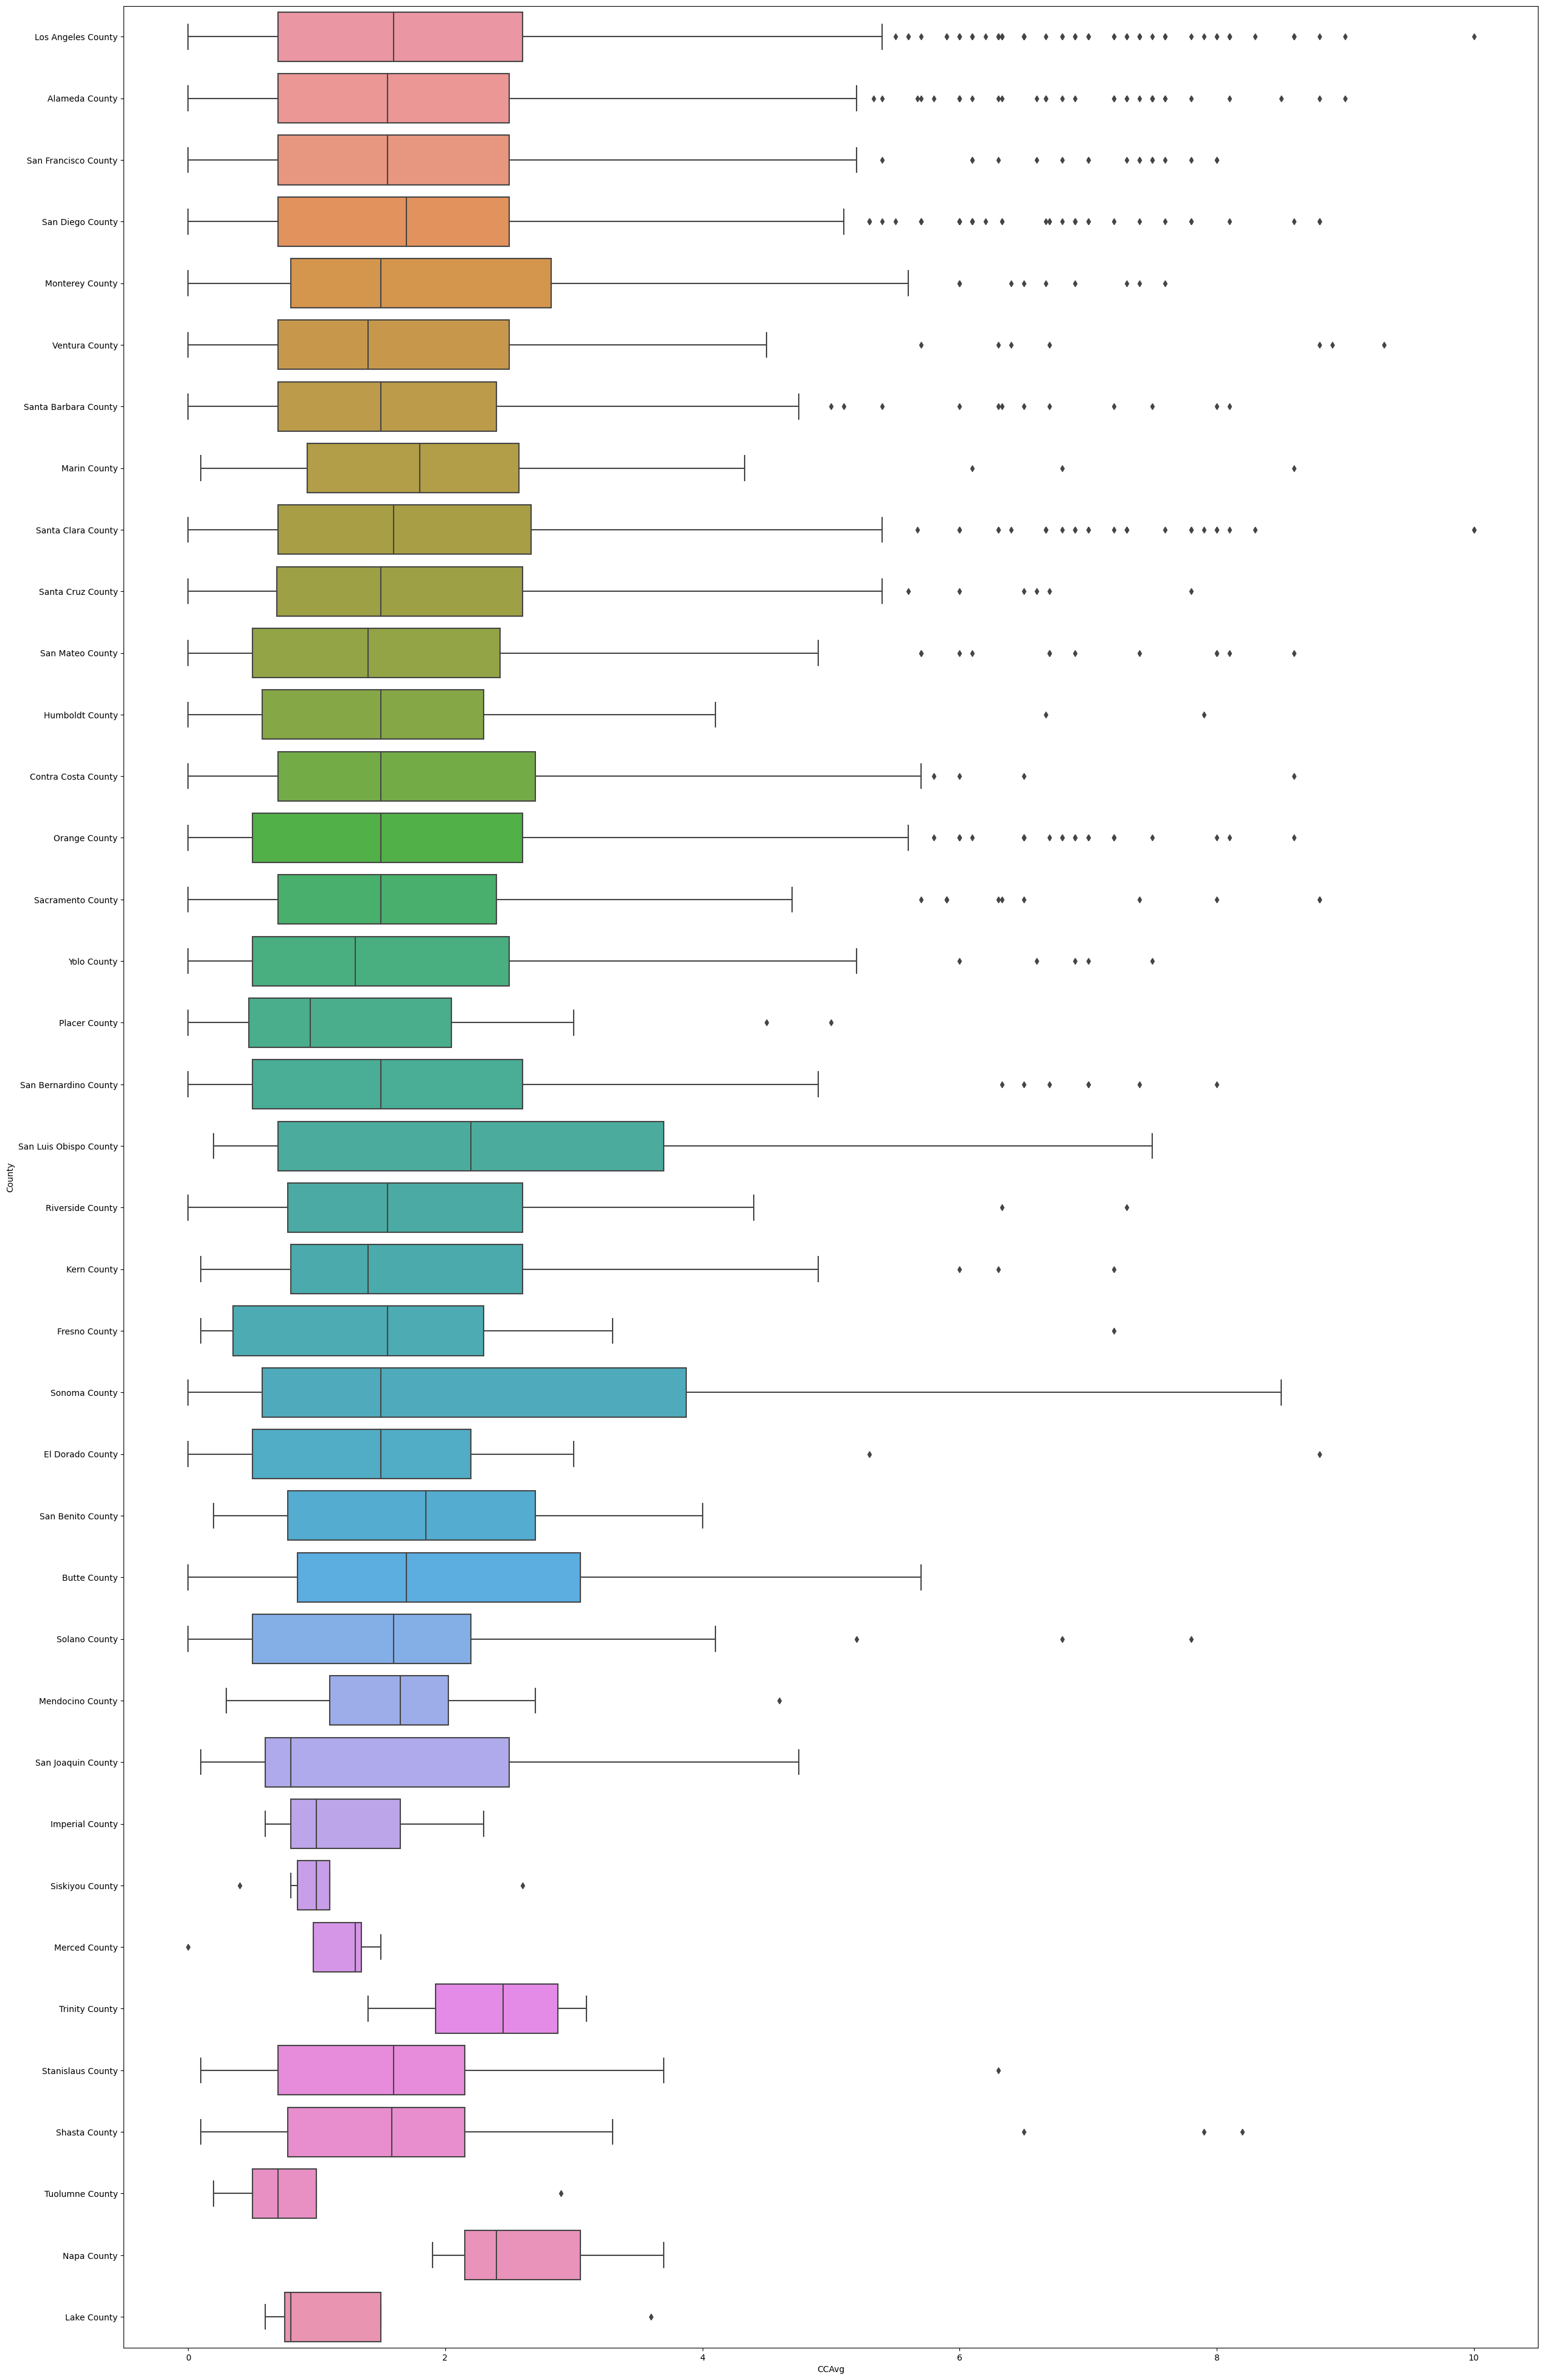

In [664]:
###
plt.figure(figsize=(30,50))
sns.boxplot(x="CCAvg", y="County", data=Loan_Data)
plt.show()

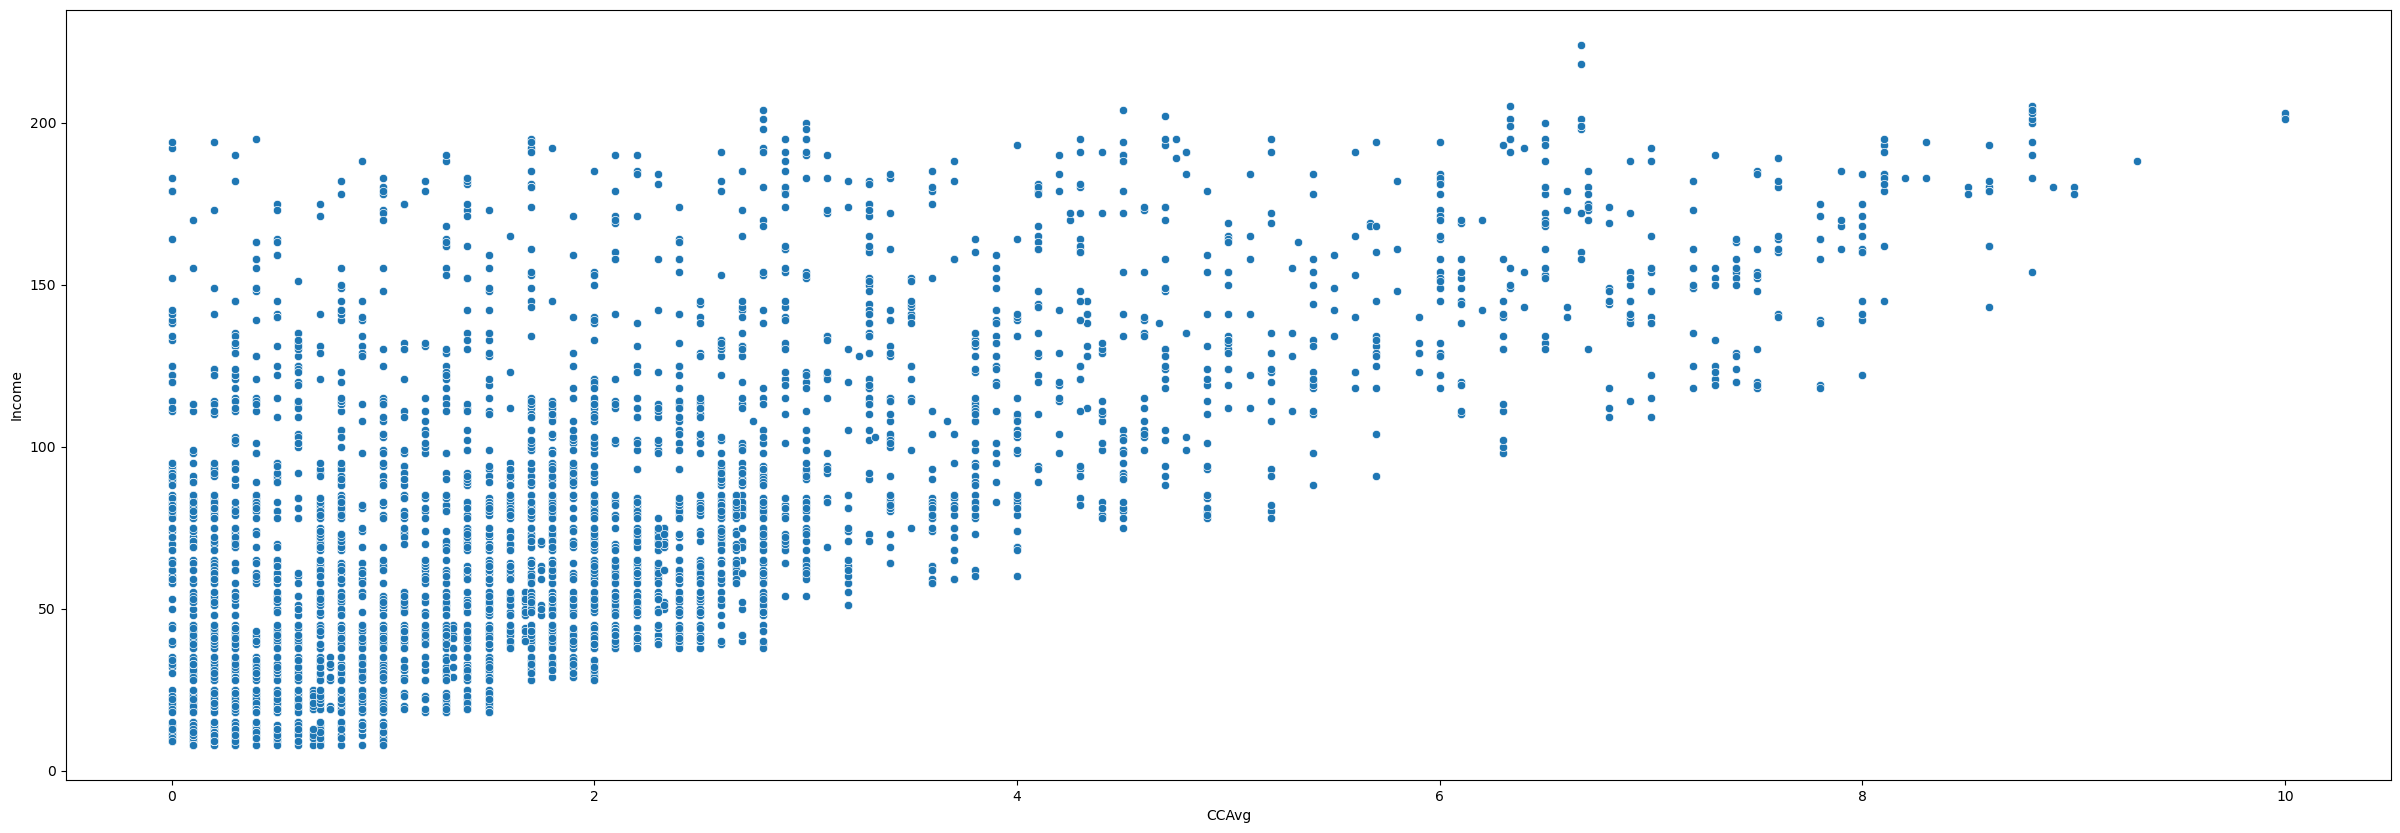

In [665]:
###
plt.figure(figsize=(30,10))
sns.scatterplot(x="CCAvg", y="Income", data=Loan_Data)
plt.show()

In [671]:
print(Loan_Data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'City', 'County', 'State'],
      dtype='object')


C:\Users\andre\AppData\Local\Temp\ipykernel_35168\3766439541.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Loan_Data[columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"


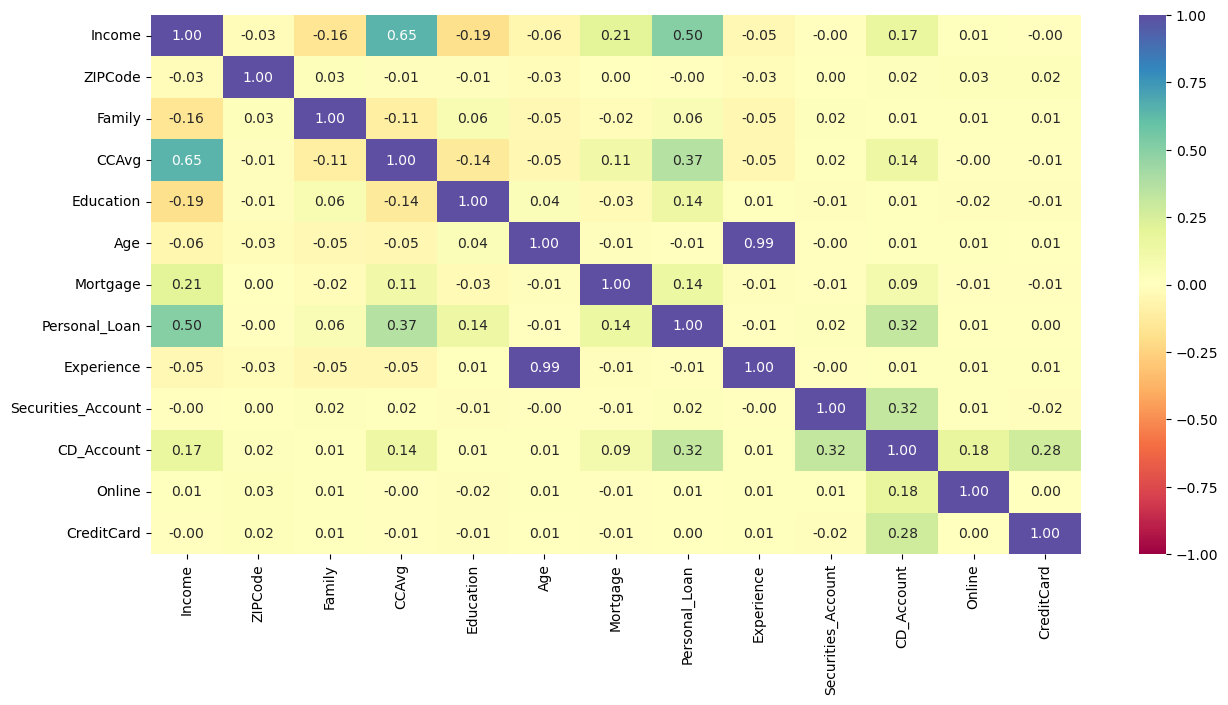

In [674]:
columns= ['Income', 'ZIPCode', 'Family', 'CCAvg','Education','Age','Mortgage', 'Personal_Loan', 'Experience','Securities_Account','CD_Account', 'Online', 'CreditCard', 'City', 'County', 'State']

plt.figure(figsize=(15, 7))
sns.heatmap(
Loan_Data[columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

* 


### Model Building: Logistic Regression

### Model Performance Improvement: Logistic Regression

### Model Building: Decision Tree

### Model Performance Improvement: Decision Tree

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___